# Exercício 6

## a)

No caso em que $\theta _1$ é conhecido, podemos calcular a verossimilhança da seguinte maneira:

$$ L(\bf{\theta}, \bf{x}) = \prod_{i = 1}^{n} \theta_1 \theta_2 x_i^{\theta_2  -1} e^{-\theta_ 1 x_i^{\theta_ 2}} $$

$$ l(\bf{\theta}, \bf{x}) = \log (L(\bf{\theta}, \bf{x})) = \sum_{i = 1}^{n} \log(\theta_1 \theta_2 x_i^{\theta_2  -1}) -\theta_ 1 x_i^{\theta_ 2}  $$

$$ U_n({\theta}) = \frac{\partial l(\bf{\theta}, \bf{x})}{\partial \theta_1} = \sum_{i = 1}^{n} \frac{1}{\theta_1} - x_i ^{\theta_2} $$

$$ U_n'({\theta}) = \frac{\partial^2 l(\bf{\theta}, \bf{x})}{\partial \theta_1^2} = \sum_{i = 1}^{n} \frac{-1}{\theta_ 1^2}$$

Com as funções score e sua derivada em relação ao parâmetro $\theta$ calculados, utilizaremos o método de Newton-Raphson para procurar o valor de $\theta$ que anule a função score:

[1] 2.2 1.0
[1] 0.179036 1.000000
[1] 0.3301178 1.0000000
[1] 0.5651961 1.0000000
[1] 0.8518028 1.0000000
[1] 1.070838 1.000000
[1] 1.141644 1.000000
[1] 1.146636 1.000000
[1] 1.146657 1.000000
Error =  4.190088e-10 
Result =  1.146657 1 
Number of iterations =  9 


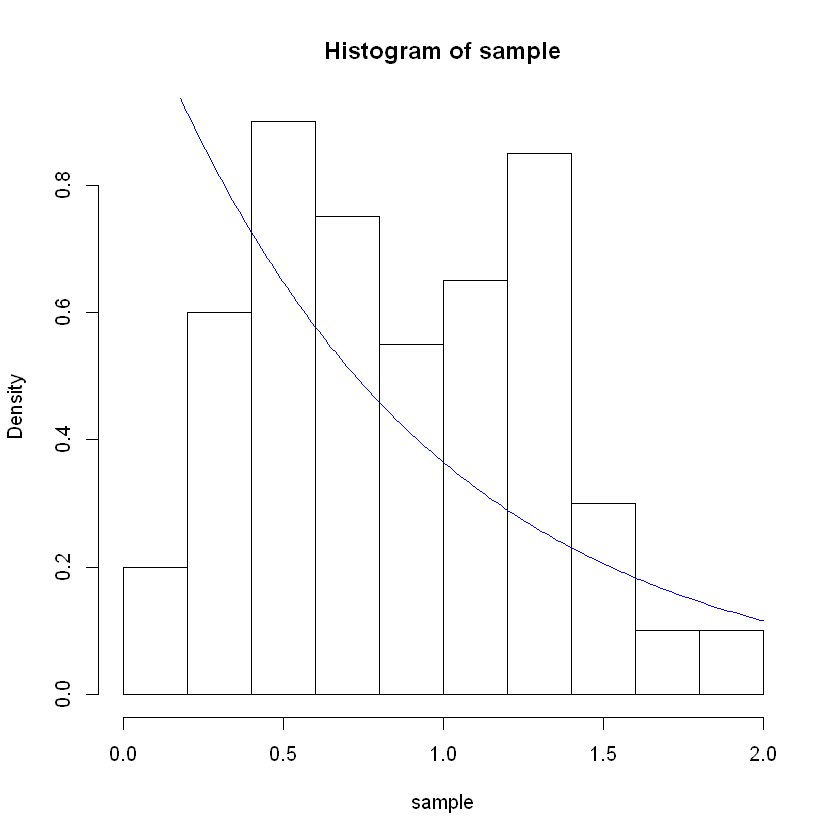

In [8]:
#função score 
score <- function(x, theta){
  value <- c(0, 0)
  for (i in x){
    value[1] <- value[1] + (1/theta[1]) - i^theta[2]
    value[2] <- value[2] + (1/theta[2]) + log(i) - theta[1]*i^theta[2]*log(i)
  }
  return(value)
}
#derivada da função score em relação de theta
scoreSlope <- function(x, theta){
  value <- c(0, 0)
  for (i in x){
    value[1] <- value[1] - 1/theta[1]^2
    value[2] <- value[2] - 1/theta[2]^2 - theta[1]*i^theta[2]*log(i)^2
  }
  return(value)
}
#amostra n = 100
sample = c(1.19, 1.33, 1.29, 0.97, 0.57, 0.26, 1.46, 0.73, 0.45, 0.85,
           1.67, 0.56, 0.45, 0.35, 0.52, 1.32, 1.22, 1.09, 0.27, 0.34,
           0.59, 0.78, 0.55, 1.29, 1.11, 1.04, 1.21, 0.38, 0.61, 1.12,
           0.72, 0.55, 0.90, 0.26, 0.90, 0.54, 0.99, 0.67, 1.36, 0.18,
           0.58, 0.22, 1.38, 1.36, 0.35, 1.43, 0.04, 0.26, 0.86, 1.06,
           1.47, 0.42, 0.62, 0.58, 0.65, 0.54, 0.76, 0.93, 1.15, 0.92,
           1.95, 1.29, 0.64, 0.13, 1.70, 1.00, 0.75, 1.09, 1.40, 1.26,
           0.87, 0.80, 0.67, 0.47, 0.66, 0.33, 0.56, 1.01, 1.54, 0.46,
           1.39, 1.30, 1.17, 1.60, 1.16, 0.93, 1.27, 0.20, 1.17, 0.42,
           1.53, 0.31, 1.31, 1.20, 0.75, 0.72, 1.97, 1.26, 0.48, 0.27)

#tolerância entre iterações para parada
eps = 10^(-5)
#theta inicial
theta = c(2.2, 1)
error = 10
iteration = 0

#iterações do método de Newton-Raphson
while(error > eps){
    thetaBefore = theta
    theta[1] <- theta[1] - score(sample, theta)[1]/scoreSlope(sample, theta)[1]
    error <- abs(theta[1] - thetaBefore[1])
    iteration = iteration + 1
}

#printa resultados
cat("Error = ", error, "\n")
cat("Result = ", theta, "\n")
cat("Number of iterations = ", iteration, "\n")

#função distribuição de probabilidade
f <- function(x, theta){
    return(theta[1]*theta[2]*x^(theta[2]-1)*exp(-theta[1]*x^theta[2]))
}

#plota hitogramas e fdp
hist(sample, probability = TRUE)
lines(seq(from=0, to=2, by=0.01), f(seq(from=0, to=2, by=0.01), theta), col="blue")

Logo, em 9 iterações, obtemos $\theta = \theta_1 = 1.146657$ com tolerância entre iterações $\epsilon = 10^{-5}$. Notamos pelo histograma de frequências e a curva de distribuição que a estimativa de máxima verossimilhança obtida não é próxima a distribuição, especialmente para classes menores que $0.5$. Isso ocorre pois no caso em que $\theta_2 = 1$, o modelo se reduz a uma distribuição exponencial, entretanto, a amostra observada não é compatível com o modelo exponencial. Logo, um valor diferente de $\theta_2$ deve ser infeirdo.

## b)

Para realizar a estimativa de máxima verossimilhança para $\theta = (\theta_1 , \theta_2)$, podemos realizar um processo similar com a técnica unidimensional mencionada, calculando a derivada parcial para cada parâmetro e convergendo individualmente cada parâmetro utilizando método de Newton-Raphson. Determinamos que o processo iterativo converge quando o maior valor da diferença absoluta do valor de parâmetro entre as iterações for menor que o valor de tolerância $\epsilon$, isto é:

$$ Diff(i, i+1) = \max (|\theta_{1(i)} - \theta_{1(i + 1)}|, |\theta_{2(i)} - \theta_{2(i + 1)}|) < \epsilon$$

Já calculamos a função score para $\theta_1$, calculamos agora função score para o parâmetro $\theta_2$:

$$ U_n({\theta}) = \frac{\partial l(\bf{\theta}, \bf{x})}{\partial \theta_2} = \sum_{i = 1}^{n} \frac{1}{\theta_2} + \log(x_ i) - \theta_1 x_ i^{\theta_2}\log(x_ i)$$

$$ U_n'({\theta}) = \frac{\partial^2 l(\bf{\theta}, \bf{x})}{\partial \theta_2^2} = \sum_{i = 1}^{n} \frac{-1}{\theta_ 2^2} - \theta_1 x_i^{\theta_2} (\log x_ i)^2$$

Assim, podemos iterativamente converger nos valores de máxima verossimilhança de $\theta$.

## c)

Por final, utilizamos o seguinte script para realizar Newton-Raphson:

In [6]:
eps = 10^(-5)
theta = c(2, 2)
error = 10
iteration = 0

while(error > eps){
    thetaBefore = theta
    theta <- theta - score(sample, theta)/scoreSlope(sample, theta)
    error <- max(abs(theta - thetaBefore))
    iteration <- iteration + 1
}

cat("Error = ", error, "\n")
cat("Result = ", theta, "\n")
cat("Number of iterations = ", iteration, "\n")

Error =  4.196248e-06 
Result =  1.035318 2.079401 
Number of iterations =  14 


Logo, em 14 iterações, obtemos $\theta = (\theta_1, \theta_2) = (1.035318, 2.079401)$.

## d)

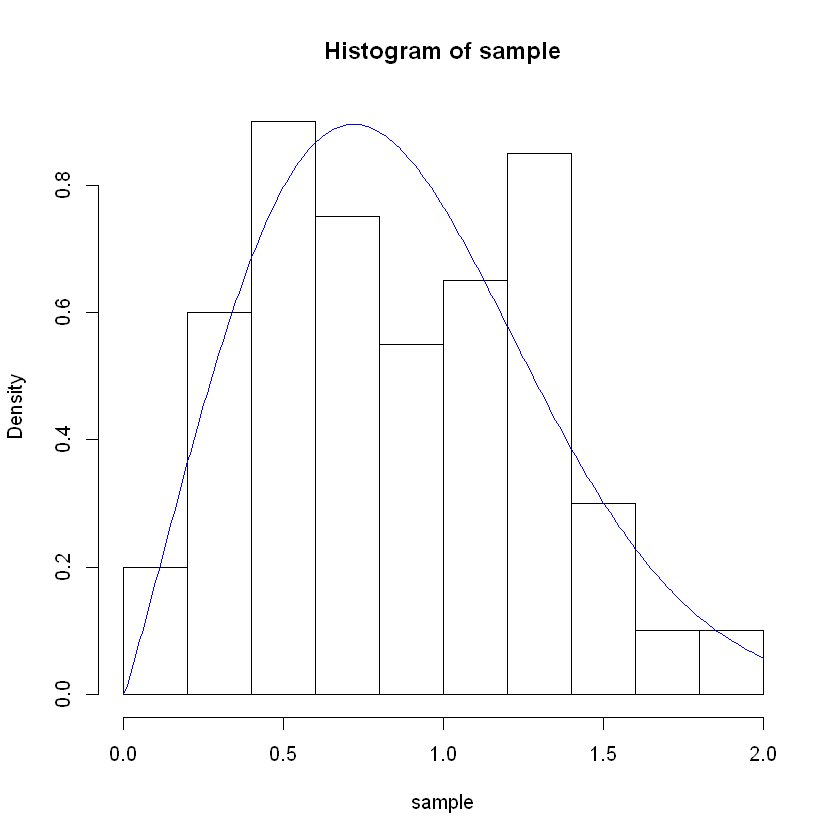

In [7]:
hist(sample, probability = TRUE)
lines(seq(from=0, to=2, by=0.01), f(seq(from=0, to=2, by=0.01), theta), col="blue")

Notamos que a distribuição obtida é próxima ao formato do histograma da amostra observada, sendo muito mais próximo do que tentativa anterior assumindo $\theta_2 = 1$. Entretanto, há discrepâncias entre algumas classes do histograma com a distribuição, o que é razoável para uma amostra com tamanho modesto ($n = 100$).

## e)
Podemos, por invariância, procurar o estimador de outra função de $\theta$, que tem imagem somente nos reais posistivos. Isto é, podemos utilizar Newton-Raphson para buscar por um $\alpha$ tal que:

$$ \theta_n = e^{\alpha_n},  \qquad i = 1,2$$

Sendo que o estimador de máxima verossimilhança de $\theta$ é igual a $e^{\hat{\alpha}}$, em que $\hat{\alpha}$ é o estimador de máxima verossimilhança de $\alpha$.
Neste caso, $\alpha$ pode variar no espaço $\mathbb{R}$, e como a imagem da função exponencial está definida somente no $\mathbb{R}_+$, conveniementemente nos restringimos no espaço pertinente para buscar os parâmetros. 

Entretanto, percebemos que devemos obter a função score em função de $\alpha$, derivadas em relação a $\alpha$. Para isso, utilizamos o pacote numDeriv disponível para R, assim realizamos derivada numérica. 

Error =  3.767823e-06 
Alpha=  0.03470743 0.7320804 
Result =  1.035317 2.079402 


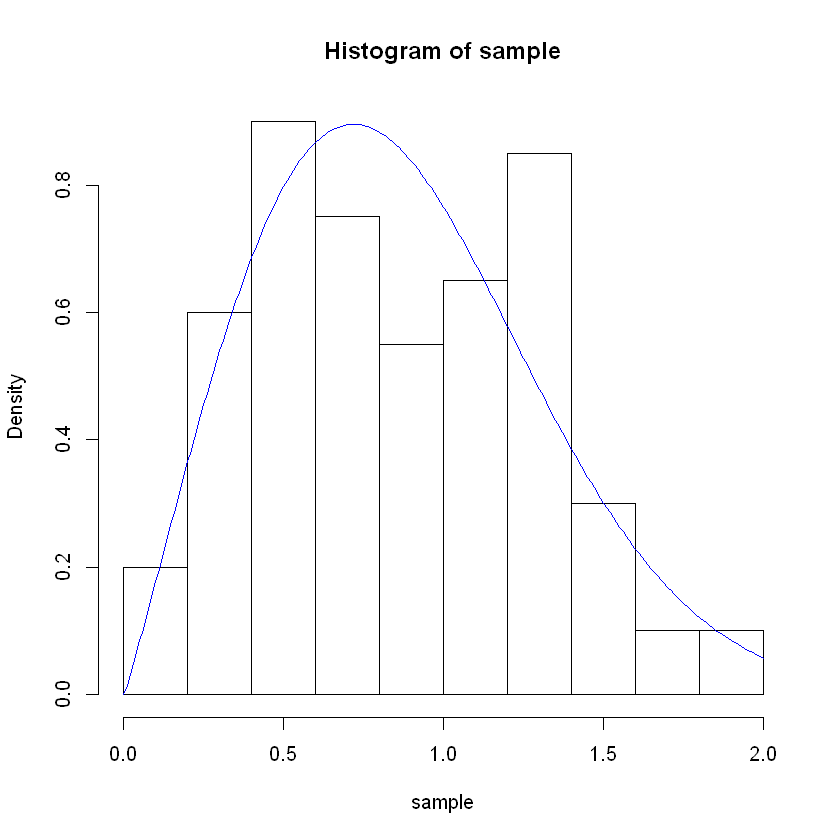

In [22]:
#biblioteca para realizar derivada numerica
library(numDeriv)

#funcao likelihood que deve ser derivada para obter score
#note que amostra não é parâmetro da função para evitar que 
#influnecie no resultado da derivada por  numDeriv
likelihood <- function(alpha){
  value <- 0
  x <- c(1.19, 1.33, 1.29, 0.97, 0.57, 0.26, 1.46, 0.73, 0.45, 0.85,
        1.67, 0.56, 0.45, 0.35, 0.52, 1.32, 1.22, 1.09, 0.27, 0.34,
        0.59, 0.78, 0.55, 1.29, 1.11, 1.04, 1.21, 0.38, 0.61, 1.12,
        0.72, 0.55, 0.90, 0.26, 0.90, 0.54, 0.99, 0.67, 1.36, 0.18,
        0.58, 0.22, 1.38, 1.36, 0.35, 1.43, 0.04, 0.26, 0.86, 1.06,
        1.47, 0.42, 0.62, 0.58, 0.65, 0.54, 0.76, 0.93, 1.15, 0.92,
        1.95, 1.29, 0.64, 0.13, 1.70, 1.00, 0.75, 1.09, 1.40, 1.26,
        0.87, 0.80, 0.67, 0.47, 0.66, 0.33, 0.56, 1.01, 1.54, 0.46,
        1.39, 1.30, 1.17, 1.60, 1.16, 0.93, 1.27, 0.20, 1.17, 0.42,
        1.53, 0.31, 1.31, 1.20, 0.75, 0.72, 1.97, 1.26, 0.48, 0.27)
  theta <- exp(alpha)
  for (i in x){
    value = value + log(theta[1]*theta[2]*i^(theta[2]-1)) - theta[1]*i^(theta[2])
  }
  return(value)
}

eps = 10^(-5)
alpha = c(2, 2)
error = 10

while(error > eps){
    alphaBefore = alpha
    alpha <- alpha - grad(likelihood, alpha)/diag(hessian(likelihood, alpha))
    error <- min(abs(alpha - alphaBefore))
}

cat("Error = ", error, "\n")
cat("Alpha= ", alpha, "\n")
cat("Result = ", exp(alpha), "\n")

f <- function(x, theta){
    return(theta[1]*theta[2]*x^(theta[2]-1)*exp(-theta[1]*x^theta[2]))
}

hist(sample, probability = TRUE)
lines(seq(from=0, to=2, by=0.01), f(seq(from=0, to=2, by=0.01), exp(theta)), col="blue")
